# さまざまな積分

積分も微分と同じように、様々な計算方法があります。非常に難しいです。
計算全般にいえることとして、計算には慣れが必要です。

ですが、機械学習で使う場合というのは「面積（確率）を求める」ということがほとんどのため、一般的な積分の計算よりは
限定的といえます。ただし、原理を知るための証明についてはその限りではないため、難しいものも一応紹介します。

身に付けるには、高校や大学初年度レベルの計算練習の参考書をやるのがおすすめです。

前節でも紹介したとおり、「変数変換の積分」で線形代数をやる意味がでてきます。お楽しみに。


<iframe src="https://www.geogebra.org/calculator/pmsqfcny?embed" width="800" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

### 三角関数の積分

$\sin x$と$\cos x$の微分は

$$\frac{d \sin x}{dx} = \cos x, \quad \frac{d \cos x}{dx} = - \sin x$$

でした。これを式変形して、左右を逆にし

$$\sin x = - \frac{d  \cos x}{dx}, \quad \cos x = \frac{d \sin x}{dx}  $$

とします。この両辺を積分すれば、$\sin x, \cos x$の積分の結果を求められそうです。


$$
\begin{aligned}
\int sin(x) dx &= \int \frac{ d - \cos x}{dx} dx\\
               &= - \cos x (+C)\\
\int cos(x) dx &= \int \frac{ d \sin x}{dx} dx\\
               &= \sin x (+C)\\ 
\end{aligned}
$$

右辺は「微分と積分は相反する演算」でしたので、打ち消しあって消えます。整理すると次のようになります。
$$
\begin{aligned}
\int sin(x) dx &= - \cos x (+C)\\
\int cos(x) dx &= \sin x (+C)\\ 
\end{aligned}
$$

$\sin x$と$\cos x$は微分しても積分しても交互に出てくるだけなので、比較的覚えやすいです。


In [19]:
using SymPy

x = symbols("x")
s = sin(x)
c = cos(x)

println("sin xの積分は", s.diff(x))
println("cos xの積分は", c.diff(x))


sin xの積分はcos(x)
cos xの積分は-sin(x)


$\tan x$の積分は、

$$\int \tan x dx = \log(\cos x) + C$$

なのですが、これは $\displaystyle \frac{f'(x)}{f(x)}$の積分の説明で紹介します。

### 対数関数の積分

対数関数$\log x$の積分は

$$
\int \log x dx = x \log x -x (+C)
$$

なのですが、部分積分の説明で紹介します。

### 指数関数の積分

指数関数$f(x) = a^x\quad(ただし a > 0 かつ a \neq 1)$の積分は
$$\int a^x dx = \frac{ a^x}{\log a} (+C)$$
であり、特に$a = e$の場合は $\log_e e = 1$ですので、
$$\int e^x dx = e^x(+C)$$
です。

これについても、置換積分の説明のときに紹介します。
$e^x$については微分しても積分しても変わらない、とても優しい関数です。


と、後半3つの積分を「後の公式で紹介する」と書いた通り、積分は基礎的でも重要な積分が多いのです。


### $\displaystyle \frac{f'(x)}{f(x)}$ の積分

積分する関数の形が$\displaystyle \frac{f'(x)}{f(x)}$ という変わった形をしているとき、次のように計算できます。

$$ \int \frac{f'(x)}{f(x)} dx = \log |cos x| (+ C) $$

これを使うと、$\tan x$の積分がとても簡単に計算できます。
$\tan x$の定義は$\tan x = \frac{ \sin x}{ \cos x}$でした。

そして三角関数の積分で紹介した通り、$\cos x$の積分は$\sin x$でした。つまり

$$
\begin{aligned}
\int \tan x dx &= \int \frac{ \sin x}{ \cos x}  dx\\
               &= \int \frac{ (\cos x)' }{\cos x} dx
\end{aligned}
$$

で今回の公式が適用できます。すると、

$$
\int \tan x dx = \log |\cos x| (+ C)
$$

が求められます。

と体感してもらえたかと思いますが、こういった特殊な計算方法が必要となるのです。

## 置換積分

複雑な積分を簡単にするための方法として**置換積分**があります。置換積分とはその名の通り、ある変数を別の変数に置き換えることで積分しやすくなるというものです。


ある関数$f(x)$の積分を考えます。


$$\int_a^b f(x) dx$$

この$f(x)$の変数を$x = g(t)$置き換えることで、　計算が楽になる場合があります（割と）。
そのときには代入してみると

$$\int_a^b f(g(t)) dx$$

となり万事解決！！！

とはいきません。積分について少し復習しましょう。積分とは「$x$軸のある区間」の図形の面積を求めていました。
そしてこの区間は$\displaystyle \int_a^b$にある$a$以上$b$以下に含まれる区間の面積でした。
これは$x$の区間です。

$$\int_a^b f(g(t)) dx$$

は変数が$t$に置き換わっているため、$t$の区間に改める必要があります。

また、$dx$ があります。この$dx$の説明を明確にしたことはありませんでしたが「変数$x$の区間に関する」の意味です。
これも$dt$に改める必要がありそうです。

と、抽象的にみてしまうと非常にわかりづらいため、具体例でみてみます。


とある$f(x)$の$x = 2$から$x=5$ の区間の積分について考えます。


<img src="images/10/02.png" style="width: 500px;">

この積分が$x=2t$と置換すると計算しやすいことがわかりました。

$$
\begin{aligned}
x &= 2t\\
t = \frac{1}{2} x
\end{aligned}
$$

と変形します。すると、$x=2$から$x=5$の範囲は

$$
\begin{aligned}
x &= 2 \rightarrow t = \frac{1}{2} \times 2 = 1\\
x &= 5 \rightarrow t = \frac{1}{2} \times 5 = \frac{5}{2}\\
\end{aligned}
$$

と、範囲を変更することができました（強引ですが）。


次の問題の$dx$ですが、「$dx$はどこか別のところで見覚えがないか？」と思い出すと、
微分の記号で出て来たことをきっと思い出すはずです。そして微分の記号は「分数のように振る舞う」
という性質がありました。これを使ってみると、

$$
\begin{aligned}
dx &= dx \times 1\\
   &= dx \times \frac{dt}{dt}\\
   &= \frac{dx}{dt} \times dt
\end{aligned}
$$

と、なんと$dt$で表現することができました！（強引ですが） $\displaystyle \frac{dx}{dt}$は「$x$を$t$」で微分したもの」なので

$$
\begin{aligned}
\frac{dx}{dt} &= \frac{d 2t}{dt}\\
              &= 2
\end{aligned}
$$

と微分することで計算できます。

以上のことを順番に適用していくと


$$
\begin{aligned}
\int_2^5 f(x) dx &= \int_1^{\frac{5}{2}} f(g(t)) \times \frac{dx}{dt} dt\\
                 &= \int_1^{\frac{5}{2}} f(g(t)) \times 2 dt\\
                 &= 2 \int_1^{\frac{5}{2}} f(g(t)) dt\\
\end{aligned}
$$

と、変数を$x$を$t$に置換することができました！（強引ですが。）

<img src="images/10/03.png" style="width: 500px;">


このように、ある変数に関する積分を、別の変数の積分に置換することで計算できるようになるというのが置換積分です。


置換積分により、次の公式を導き出せます。

$$\int e^{ax+b} dx = \frac{e^{ax+b}}{a} (+C)$$

$t = ax + b$とします。このとき$x= \frac{t - b}{a}$でありかつ、

$$
\begin{aligned}
\frac{d t}{dx} &= a\\
dt            &= a dx\\
dx            &= \frac{dt}{a}\\
\end{aligned}
$$

より、これらを求めたい公式の左辺に代入すると、

$$
\begin{aligned}
\int e^{ax+b} dx &= \int e^t \frac{dt}{a}
                 &= \frac{1}{a} \int e^t dt
                 &= \frac{e^t}{a} (+ C)
\end{aligned}
$$
が求められます。2つ目の=は$\displaystyle \frac{1}{a}$は$t$の関数ではないので、外に出すことができます。
3つ目の=は、$e^t$は積分しても変わらないので、積分はそのまま外れます。



この公式を使って、置換積分は指数関数$f(x) = a^x$の積分を求めるときに使えます。少々トリッキーな方法なので、難しいかもしれません。
丁寧に説明してみます。わからなければ説明が悪いと思ってください。

また、
$$ X = e^{\log X}$$
というテクニックを使います。これは日本語で表すと、「$X$は$e$の$\log X$乗です。
これを$\log$を使って表現すると
$$\log X = \log_e X$$
であり、「特に指定がない場合にはログの底は$e$とする」としていたので
$$\log_e X = \log_e X$$
と、至極当たり前なことをいっています。これを逆に変形すれば、$\displaystyle X = e^{\log X}$がいえます。
と、だまされたような説明です。

この$X$に$a^x$を代入します。すると

$$
\begin{aligned}
a^x &= e^{\log a^x}\\
    &= e^{x \log a}
\end{aligned}
$$

となります(2つ目の=は対数の性質で紹介しています)。

これを積分すると

$$
\begin{aligned}
\int a^x dx &=  e^{\log a^x}\\
    &= e^{x \log a}
\end{aligned}
$$

ここで先ほど求めた公式を使うと(+b はありませんが、+0と考えれば良いです)

$$\int a^x dx = \frac{e^{x \log a}}{\log a} (+ C)$$

です。



……と、どうしても計算がふくざつになってしまいます。






### 部分積分

置換積分も非常に厄介な積分でしたが、部分積分はもっと厄介だと感じられる積分です。
とりあえず説明します。

部分積分は「2つの関数の関数の積の形になっている」場合に適用できることがありますし、適用しないと計算できない場合が多いです(もちろん、アルゴリズム等で近似はできます)。
すなわち、$f(x)g(x)$のような形です。またに、$f(x)$と$g(x)$がともに**微分可能である**という条件があります。

更に、このときに次のような形の微分であるならば、右辺のような計算が適用できます。

#### 不定積分
　$$\int f(x)g'(x) dx = f(x)g(x) - \int f'(x)g(x) dx (+ C)$$
 
 #### 定積分
$$\int_a^b f(x)g'(x) dx = \Bigg[ f(x)g(x) \Bigg]_a^b - \int_a^b f'(x)g(x) dx$$
 

ところどころに微分の記号が入った関数がありますが、条件に「微分可能」が必要だったのはこれが理由です。右辺の「積分した結果に積分がある」のは、部分積分を適用しないといけない積分は「特殊な関数」が多いからです。


対数関数$f(x) = \log x$の積分を例に見ていきます。

積分に入る前に、一つのテクニックを紹介します（このテクニックは部分積分でよく出現します）。
$\log x$を

$$\log x= 1 \times \log x$$

として見なします。次に$g(x) = x$と置くと、$g'(x) = 1$です（$x=x^1$と見なして初等的な微分の計算方法を参照）。

すると、

$$
\begin{aligned}
\log x &= (\log x) \times (1)\\
       &= f(x) g'(x)
\end{aligned}
$$

という形にみなせます。この右辺は部分積分の左辺の関数と同じ形です。ですので、部分積分を適用できます。
先に準備として確認すると、$\displaystyle \frac{d \log x}{dx} = \frac{1}{x}$でしたので、

$$
\begin{aligned}
\int \log x dx  &= \int f(x) g'(x) dx\\
                &= f(x)g(x) - \int f'(x)g(x) dx\\
                &= x\log x - \int (\frac{1}{x} \times x) dx\\
                &= x\log x - \int 1 dx\\                
                &= x\log x - x (+C)
\end{aligned}
$$
と、対数関数の証明で紹介したとおりになりました。


部分積分は「なかなか消えない」関数の合成関数で多用されます。例えば、$\sin x$と$\cos x$は積分すると$-\cos x$や$\sin x$になりました。
つまり、$\sin x$と$\cos x$は「なかなか消えない」のです。これらを含んだ積分も、部分積分を使うことが多いです。


……と、ここまでご紹介したとおり、まったくプログラマブルな説明ではありません。ただ、やはり特に確率を扱う際にはここら辺の計算が証明中に出て来ます。
覚えなくても構わないので「このような計算がある」という認識だけあればよいと思います。




### 　重積分の変数変換

積分で計算しづらいということは、重積分でも当然に計算しづらい場合があります（むしろ多いです）。

重積分が特有、というわけではないのですが、積分とは少々異なる場合があります。それは「積分における置換積分」の場合です。
置換積分は$2x = t$などと変数を別の変数に置いて、積分の範囲や$dx$などを変換して計算しました。重積分の場合、これが変数の個数分発生します。
更に少々やっかいなのが$dxdy$の変換です。と管を巻いていても仕方がないので、具体的に見ていきましょう。

重積分可能な多変数関数を$f(x,y) = x^2 - y^2$とします。
これをグラフにしてみましょう。




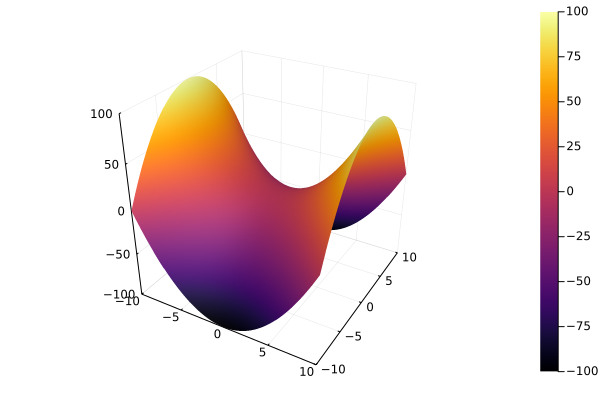

In [6]:
using Plots

f = (x, y) -> x^2 - y^2
X = -10:0.1:10
Y = -10:0.1:10

p = plot(X, Y, f, st=:surface)


$f(x,y) = x^2 - y^2$ 馬の鞍の形をしています。この積分を考えるので、


$$\int \int f(x, y) dx dy$$

を解きます（今回は不定積分を考えます）。

これを置換積分のときのように、別の変数である$u,v$で置換します。今回の場合は、以下のように定義します。
$$
\begin{aligned}
u &= x+y\\
v &= x-y\\
\end{aligned}
$$

ここまでのストーリーをJuliaで書いてみます。

In [7]:
f = (x, y) -> x^2 - y^2

u = (x, y) -> x+y
v = (x, y) -> x-y

#15 (generic function with 1 method)

さて、元の関数の$f(x)$ですが、因数分解をすると

$$
\begin{aligned}
f(x, y) &= x^2 - y^2\\
        &= (x + y)(x - y)
\end{aligned}
$$

と変形できます。右辺を$u,v$と同じ形をしているため、

$$f(x, y) = uv$$

となりますね。これで$f(x)$を$u,v$で置き換えることに成功しました。

次に$dx,dy$を$du,dv$に変換するのですが、これが「少しだけ」、置換積分と違うところです。


ここで置換積分のときを思い出してみましょう。$x$と$t$の関係式から$dx$と$dt$の関係式を求めて
$dx$に代入すること、$dt$に変換しました。これは次のように言い換えることもできます。

$$\int f(x) dx = \int f(g(t)) \frac{dx}{dt} dt  $$

$dx$に $x$の$t$に関する「とある微分」 　$\displaystyle \frac{dt}{dx}$　をかけることで「分数のような振る舞い」
で$dx$を消し、$dt$が残るようにしています。

これと同じように「とある微分」をかけることで$dxdy$を打ち消して$dudv$にすればよさそうです。
それを（現段階では何かはわかりませんが）$\displaystyle \frac{\partial(x,y)}{\partial(u,v)}$としておきます。
つまり、それぞれの$x,y$を$u,v$で表す式を$x = \phi(u, v), y=\psi(u, v)$とすれば、

$$\int \int  f(x,y) dxdy = \int \int  f(\phi(u, v), \psi(u, v)) \Bigg|\frac{\partial(x,y)}{\partial(u,v)} | dudv$$

のようにするのが、変数変換の重積分の方法です。


おそらくここまでで混乱してしまうことは重々承知しています。
今回お話したい結論からいうと、　$\displaystyle \frac{\partial(x,y)}{\partial(u,v)}$　は実は**行列**の形をしています。
つまり、微分積分学にも行列が出てくることを紹介したいがための解説なのですが、そこを伝えるまでの紆余曲折が難しいのです。
これは力不足から来るものでしょう。もう少しだけ、お付き合いください。



$u,v$の定義を再度書きます。

$$
\begin{aligned}
u &= x+y\\
v &= x-y\\
\end{aligned}
$$

この$u+v$と$u-v$を考えると、

$$
\begin{aligned}
u + v &= (x+y) + (x-y)\\
      &= 2x\\
  x   &= \frac{u+v}{2}\\    
u - v &= (x+y) + (x-y)\\
      &= 2y\\
  y   &= \frac{u-v}{2}\\    
\end{aligned}
$$

という形になります。これは$x,y$を$u,v$を使って表しています。この式が上での説明の$\phi, \psi$（ファイ、プサイ）です。

今回の場合は$x,y$という変数にそれぞれ$u,v$という複数の変数があります。
そのため、$u,v$についての$x,y$の「それぞれの偏微分」を考える必要があります。
偏微分ですので、$x,y$それぞれの$u,v$についての偏微分をします。

$$
\begin{aligned}
\frac{dx}{du} &= \frac{1}{2}\\
\frac{dx}{dv} &= \frac{1}{2}\\
\frac{dy}{du} &= \frac{1}{2}\\
\frac{dy}{dv} &= - \frac{1}{2}\\
\end{aligned}
$$

このとき、これを行列としたもの、すなわち

$$
\begin{aligned}
\frac{\partial(x,y)}{\partial(u,v)} &=  
  \left(
    \begin{array}{cc}
      \frac{dx}{du} & \frac{dx}{dv} \cr
      \frac{dy}{du} & \frac{dy}{dv}
    \end{array}
  \right)\\
  &=   \left(
    \begin{array}{cc}
      \frac{1}{2} & \frac{1}{2} \cr
      \frac{1}{2} & -\frac{1}{2}
    \end{array}
  \right)
\end{aligned}
$$

のようになります。**ヤコビ行列**と呼びます。

更にもう一つ、行列の知識を必要とします。

$$\int \int  f(x,y) dxdy = \int \int  f(\phi(u, v), \psi(u, v)) \Bigg|\frac{\partial(x,y)}{\partial(u,v)} | dudv$$

$\frac{\partial(x,y)}{\partial(u,v)}$ は **行列式** というもので詳細は省きますが、今回のような縦横に2つずつ数が並んだ行列の場合は


$$
\left|
    \begin{array}{cc}
      a & b \cr
      c & d
    \end{array}
\right|
= ad - bc
$$

と計算します。このようなヤコビ行列の行列式を**ヤコビヤン**といいます。


ですので、今回の場合は、


$$
\begin{aligned}
\int \int  f(x,y) dxdy &= \int \int  f(\phi(u, v), \psi(u, v))　\times | (\frac{1}{2} \times - \frac{1}{2}) - (\frac{1}{2} \times \frac{1}{2})|　 dudv\\
                       &=  \int \int  f(\phi(u, v), \psi(u, v))　\times |-\frac{1}{2}|　 dudv\\
                       &= \frac{1}{2} \int \int  f(\phi(u, v), \psi(u, v))　\times 　 dudv\\
\end{aligned}
$$

です。


これらの計算は「慣れる」ことが必要です。計算するには計算練習をして慣れる必要がありますが、機械学習を理解するという点においては、
微分記号や積分記号が出てきても「見慣れる」ことの方が重要かもしれません。

まずは見慣れて、見慣れてきたらちょっと計算してみたりすることで、徐々に慣れてみてください。

次回からは線形代数を紹介します。